<a href="https://colab.research.google.com/github/RealB1ackY/ISnT_Lab5-6/blob/main/PR3_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')

In [ ]:
df['Admission status'].value_counts()

1    60
0    40
Name: Admission status, dtype: int64

In [ ]:
df['Admission status'].value_counts()/np.float(len(df))

1    0.6
0    0.4
Name: Admission status, dtype: float64

In [ ]:
print(round(df.describe(),2))

       Exam 1 marks  Exam 2 marks  Admission status
count        100.00        100.00            100.00
mean          65.64         66.22              0.60
std           19.46         18.58              0.49
min           30.06         30.60              0.00
25%           50.92         48.18              0.00
50%           67.03         67.68              1.00
75%           80.21         79.36              1.00
max           99.83         98.87              1.00


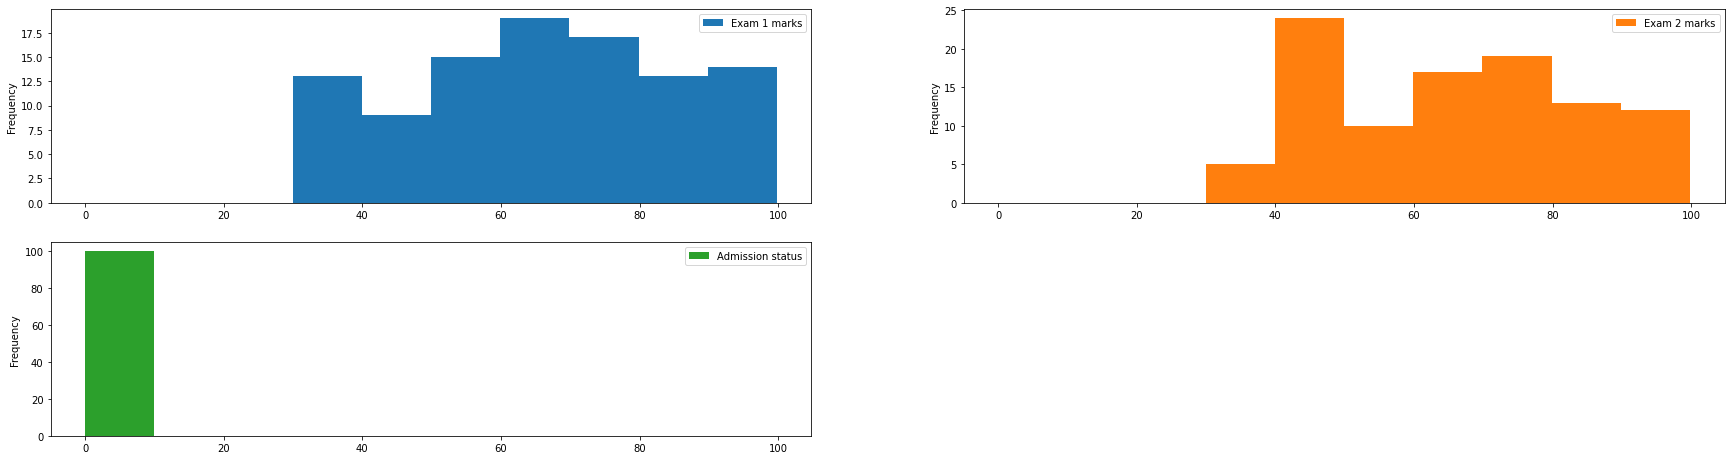

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline
# plot histograms of the variables


plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(6,2), sharex=False, sharey=False)

plt.show()

In [ ]:
correlation = df.corr()

correlation['Admission status'].sort_values(ascending=False)

Admission status    1.000000
Exam 1 marks        0.574057
Exam 2 marks        0.512323
Name: Admission status, dtype: float64

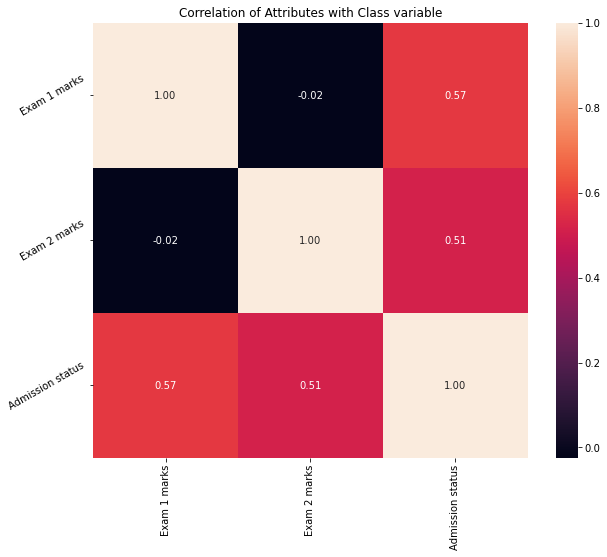

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [ ]:
X = df.drop(['Admission status'], axis=1)

y = df['Admission status']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((80, 2), (20, 2))

In [ ]:
for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [ ]:
X_train.isnull().sum()        
      

Exam 1 marks    0
Exam 2 marks    0
dtype: int64

In [ ]:
X_test.isnull().sum()

Exam 1 marks    0
Exam 2 marks    0
dtype: int64

In [ ]:
X_train.head()

,Exam 1 marks,Exam 2 marks
43,82.368754,40.618255
62,56.253817,39.261473
3,60.182599,86.308552
71,64.039320,78.031688
45,62.222676,52.060992


In [ ]:
X_test.head()

,Exam 1 marks,Exam 2 marks
26,80.190181,44.821629
86,42.075455,78.844786
2,35.847409,72.902198
55,49.586677,59.808951
75,99.827858,72.369252


In [ ]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

X_train.head()

,Exam 1 marks,Exam 2 marks
0,0.804516,-1.393624
1,-0.505296,-1.465489
2,-0.308245,1.026459
3,-0.114809,0.588058
4,-0.205924,-0.787535


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# создаем экземпляр модели
knn = KNeighborsClassifier(n_neighbors=3)


#подгоняем модель к учебному набору
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1],
      dtype=int64)

In [ ]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([0.33333333, 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       1.        , 1.        , 1.        , 0.        , 0.66666667,
       0.        , 1.        , 0.        , 0.33333333, 0.        ])

In [ ]:
# probability of getting output as 4 - malignant cancer

knn.predict_proba(X_test)[:,1]

array([0.66666667, 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       0.        , 0.        , 0.        , 1.        , 0.33333333,
       1.        , 0.        , 1.        , 0.66666667, 1.        ])

In [ ]:
from sklearn.metrics import accuracy_score

print('Оценка точности модели: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели: 0.9000


In [ ]:
y_pred_train = knn.predict(X_train)

print('Оценка точности тренировочного набора: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Оценка точности тренировочного набора: 0.9500


In [ ]:
print('Оценка тренировочного набора: {:.4f}'.format(knn.score(X_train, y_train)))

print('Оценка за тестовый набор: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9500
Test set score: 0.9000


In [ ]:
y_test.value_counts()

1    12
0     8
Name: Admission status, dtype: int64

In [ ]:
# создайте экземпляр модели с k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(X_train, y_train)

# прогнозировать на тестовом наборе
y_pred_5 = knn_5.predict(X_test)


print('Оценка точности модели с k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Оценка точности модели с k=5 : 0.8000


In [ ]:
# создайте экземпляр модели с k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)

knn_6.fit(X_train, y_train)

y_pred_6 = knn_6.predict(X_test)


print('Оценка точности модели k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Оценка точности модели k=6 : 0.8000


In [ ]:
# создайте экземпляр модели с k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)

knn_7.fit(X_train, y_train)

y_pred_7 = knn_7.predict(X_test)


print('Оценка точности модели k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Оценка точности модели k=7 : 0.9000


In [ ]:
# создайте экземпляр модели с k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)

knn_8.fit(X_train, y_train)

y_pred_8 = knn_8.predict(X_test)


print('Оценка точности модели k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Оценка точности модели k=8 : 0.8500


In [ ]:
# создайте экземпляр модели с k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)

knn_9.fit(X_train, y_train)

y_pred_9 = knn_9.predict(X_test)


print('Оценка точности модели k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Оценка точности модели k=9 : 0.9000


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 8  0]
 [ 2 10]]

True Positives(TP) =  8

True Negatives(TN) =  10

False Positives(FP) =  0

False Negatives(FN) =  2


In [ ]:
cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[ 8  0]
 [ 2 10]]

True Positives(TP) =  8

True Negatives(TN) =  10

False Positives(FP) =  0

False Negatives(FN) =  2


<AxesSubplot:>

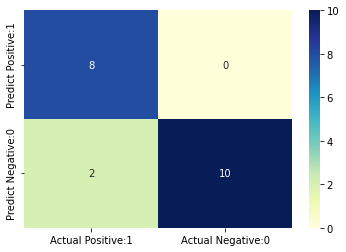

In [ ]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.83      0.91        12

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



In [ ]:
TP = cm_7[0,0]
TN = cm_7[1,1]
FP = cm_7[0,1]
FN = cm_7[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Точность классификации : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Ошибка классификации : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall : {0:0.4f}'.format(recall))

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

F1 = 2 * (precision * recall) / (precision + recall)

print('F1: {0:0.4f}'.format(F1))

Точность классификации : 0.9000
Ошибка классификации : 0.1000
Precision : 1.0000
Recall : 0.8000
Specificity : 1.0000
F1: 0.8889


In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.9199999999999999

In [ ]:
knn_cv.best_params_

{'n_neighbors': 1}

In [ ]:

neighbors = []
cv_scores = []
  
from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is  1 


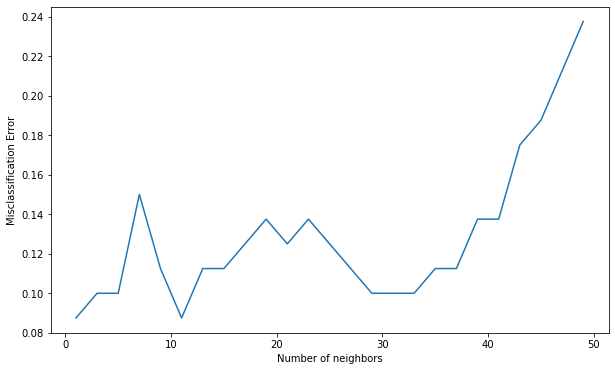

In [ ]:
MSE = [1-x for x in cv_scores]
  
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)
  
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()